In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copy
from pathlib import Path
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#import duals
df_duals=pd.read_csv(r"C:\Users\hssemba\Documents\GitHub\Exp100_simple_100\duals.csv")

#import nodal load
nodal_load=pd.read_csv(r"C:\Users\hssemba\Documents\GitHub\Exp100_simple_100\nodal_load.csv")

In [3]:
#NODE_NUMBER = [50,75,100,125,150,175,200,225,250,275,300]
NODE_NUMBER = [100]
UC_TREATMENTS = ['_simple']
#trans_p = [25,50,75,100]
trans_p = [100]

In [4]:
for NN in NODE_NUMBER:
    
    for UC in UC_TREATMENTS:
        
        for T_p in trans_p:
            path=str(Path.cwd()) + str(Path('/Exp' + str(NN) + UC + '_' + str(T_p)))
            os.makedirs(path,exist_ok=True)
            
            FN = 'Results_' + str(NN) + '.xlsx'

In [5]:
df_duals

,Bus,Time,Value
0,bus_1001,1,0.010000
1,bus_1001,2,0.010000
2,bus_1001,3,0.010000
3,bus_1001,4,5.027223
4,bus_1001,5,5.027123
...,...,...,...
875995,bus_8140,8756,13.400469
875996,bus_8140,8757,13.349506
875997,bus_8140,8758,13.282781
875998,bus_8140,8759,13.290822


In [6]:
nodal_load

,bus_1001,bus_1081,bus_2001,bus_2008,bus_3002,bus_3006,bus_4002,bus_4003,bus_4007,bus_4017,...,bus_7410,bus_7422,bus_7428,bus_8001,bus_8002,bus_8060,bus_8070,bus_8087,bus_8129,bus_8140
0,676.042566,366.776606,0.0,216.883687,84.169594,390.614289,56.640797,89.753075,192.984677,740.700929,...,113.296466,0.0,0.0,43.752793,143.967621,108.916737,537.618200,1284.524360,1393.799702,186.158867
1,679.279531,368.532773,0.0,217.922150,84.572607,392.484593,56.911999,90.182822,193.908709,744.247486,...,113.838942,0.0,0.0,43.962286,144.656954,109.438242,540.192375,1290.674803,1400.473367,187.050216
2,680.030661,368.940286,0.0,218.163123,84.666125,392.918592,56.974931,90.282544,194.123128,745.070455,...,113.964822,0.0,0.0,44.010898,144.816911,109.559256,540.789705,1292.101997,1402.021974,187.257051
3,682.279491,370.160355,0.0,218.884578,84.946112,394.217955,57.163345,90.581104,194.765084,747.534369,...,114.341699,0.0,0.0,44.156440,145.295814,109.921563,542.578072,1296.374918,1406.658395,187.876302
4,690.878644,374.825695,0.0,221.643304,86.016736,399.186507,57.883807,91.722749,197.219818,756.955966,...,115.782812,0.0,0.0,44.712969,147.127059,111.306967,549.416489,1312.713863,1424.387305,190.244213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,748.937106,406.324429,0.0,240.269251,93.245211,432.732419,62.748112,99.430733,213.793321,820.567281,...,125.512700,0.0,0.0,48.470454,159.490983,120.660724,595.587081,1423.028674,1544.086671,206.231516
8756,731.905068,397.083956,0.0,234.805141,91.124665,422.891386,61.321119,97.169518,208.931316,801.906257,...,122.658339,0.0,0.0,47.368158,155.863901,117.916704,582.042471,1390.666707,1508.971649,201.541478
8757,717.047659,389.023295,0.0,230.038681,89.274867,414.306843,60.076322,95.197012,204.690086,785.627849,...,120.168419,0.0,0.0,46.406601,152.699920,115.523038,570.227218,1362.436674,1478.340068,197.450259
8758,699.668862,379.594693,0.0,224.463326,87.111148,404.265454,58.620276,92.889760,199.729094,766.586902,...,117.255945,0.0,0.0,45.281863,148.998993,112.723152,556.406849,1329.415842,1442.510132,192.664736


In [7]:
#rename value as duals price
df_duals=df_duals.rename(columns={"Value": "duals_price"})
#set the bus as an index
df_duals = df_duals.set_index('Bus')

In [8]:
df_duals["weight_frac"]=nodal_load.multiply(1./nodal_load.sum(axis=1), axis=0).iloc[0]

In [9]:
#df_duals['weighted_dual'] = df_duals.duals_price.multiply(nodal_frac, axis=0).values
df_duals['weighted_dual']=df_duals['weight_frac']*df_duals['duals_price']

In [10]:
df_duals

,Time,duals_price,weight_frac,weighted_dual
Bus,,,,
bus_1001,1,0.010000,0.018231,0.000182
bus_1001,2,0.010000,0.018231,0.000182
bus_1001,3,0.010000,0.018231,0.000182
bus_1001,4,5.027223,0.018231,0.091653
bus_1001,5,5.027123,0.018231,0.091651
...,...,...,...,...
bus_8140,8756,13.400469,0.005020,0.067274
bus_8140,8757,13.349506,0.005020,0.067018
bus_8140,8758,13.282781,0.005020,0.066683


In [11]:
df_duals2=df_duals.groupby(['Time'], sort=True).agg({'duals_price':'mean','weighted_dual':'sum'}).reset_index()

In [12]:
df_duals2

,Time,duals_price,weighted_dual
0,1,18.203214,18.154331
1,2,18.203214,18.154331
2,3,18.203214,18.154331
3,4,18.256025,18.250214
4,5,18.270219,18.259136
...,...,...,...
8755,8756,13.307684,13.356935
8756,8757,13.238264,13.292196
8757,8758,13.015667,13.084677
8758,8759,13.005448,13.070285


In [13]:
#nodal_load.sum(axis=1)

In [14]:
#list_1= list(nodal_load.iloc[0,:])
#nodal_frac=[]
#for i in list_1:
#    x_1=i/sum(list_1)
#    nodal_frac.append(x_1)
#nodal_frac

#buses=list(df_duals["Bus"].unique())

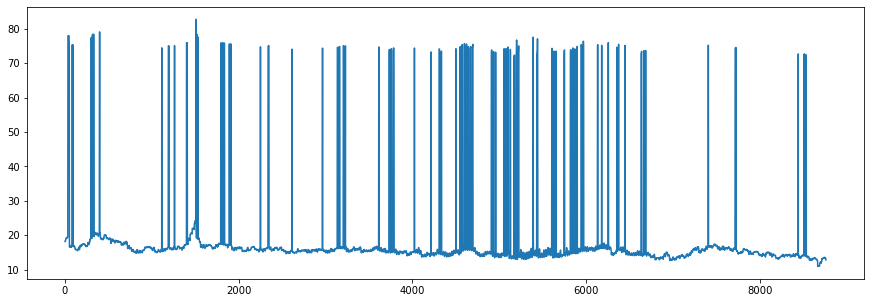

In [15]:
fig = plt.figure(figsize=(15,5))
plt.plot(df_duals2["Time"], df_duals2["weighted_dual"] )

In [17]:
#lmps.rename(columns = {"weighted_dual":"FN"},  inplace = True)

In [18]:

lmps=df_duals2.columns.str.replace("weighted_dual", "FN")

In [19]:
df=pd.dataframe()

AttributeError: module 'pandas' has no attribute 'dataframe'